# *EDA*

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

#### Data import Using Pandas

In [2]:
data = pd.read_csv(r'C:\Users\Lenovo\Downloads\ecommerce_customer_behavior_dataset.csv')

data.head(5)

,SS,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,Yes,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,Yes,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,Yes,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,No,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,Yes,7,4


In [3]:
data.columns

Index(['SS', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SS                        5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [5]:
data.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


<Axes: >

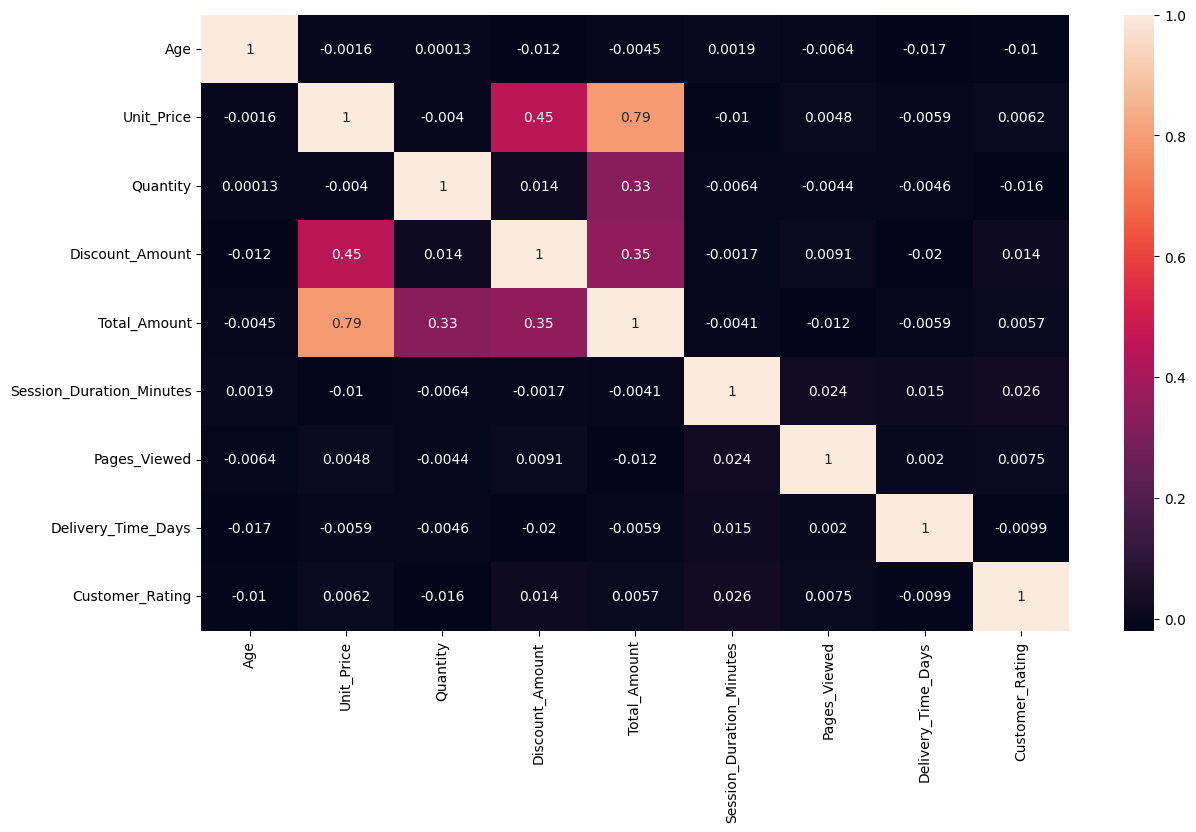

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(numeric_only= True),annot= True)

## *Data Cleaning*

In [7]:
data.isnull().sum()

SS                          0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(5000, 18)

In [10]:
numeric_columns = data[['Age','Unit_Price','Quantity','Discount_Amount','Total_Amount','Session_Duration_Minutes','Pages_Viewed','Is_Returning_Customer','Delivery_Time_Days','Customer_Rating']]

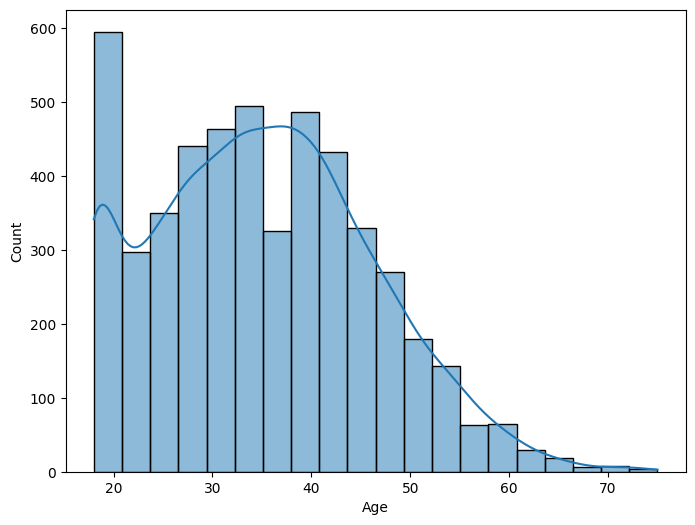

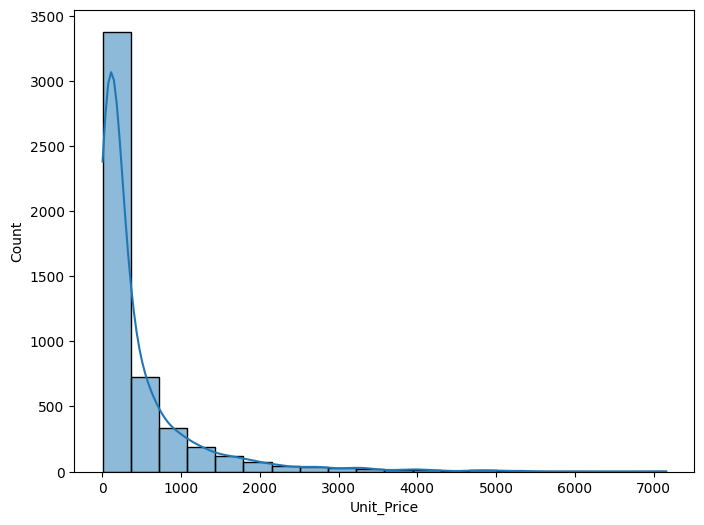

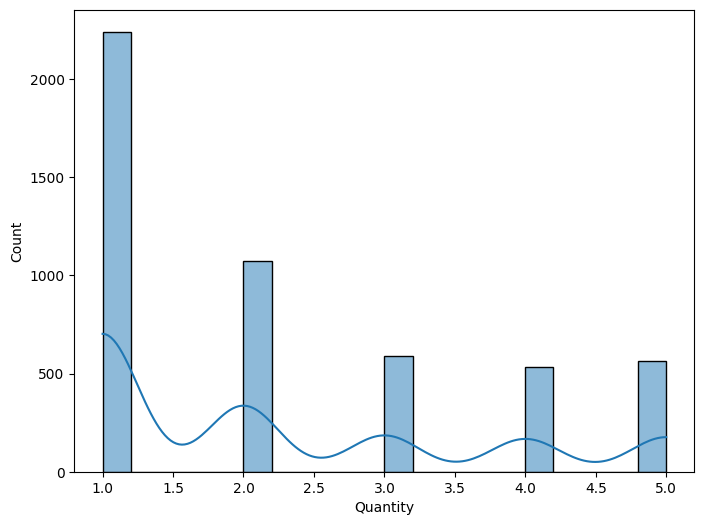

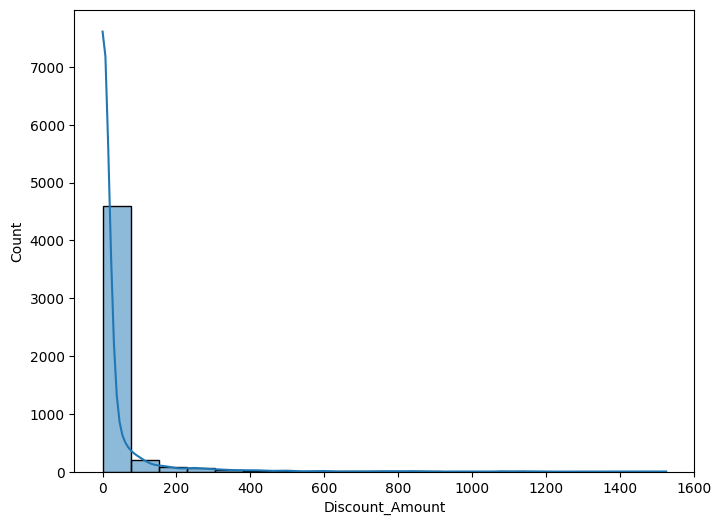

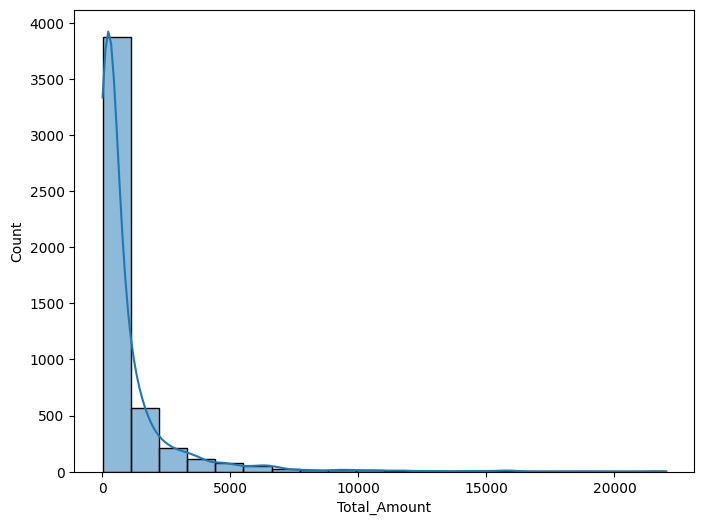

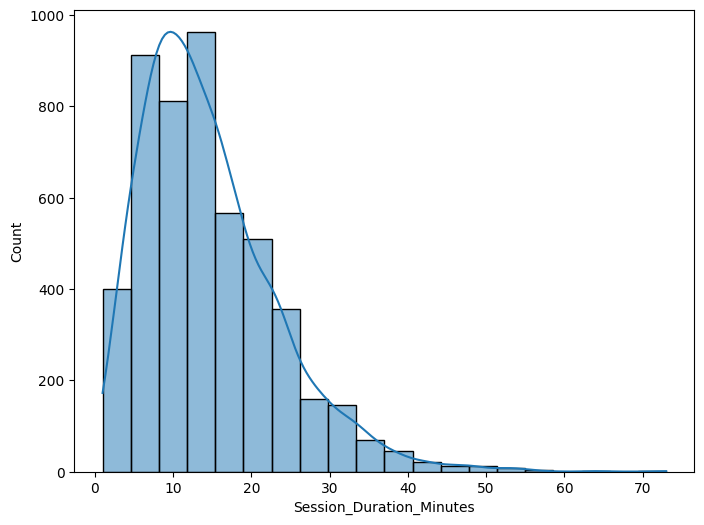

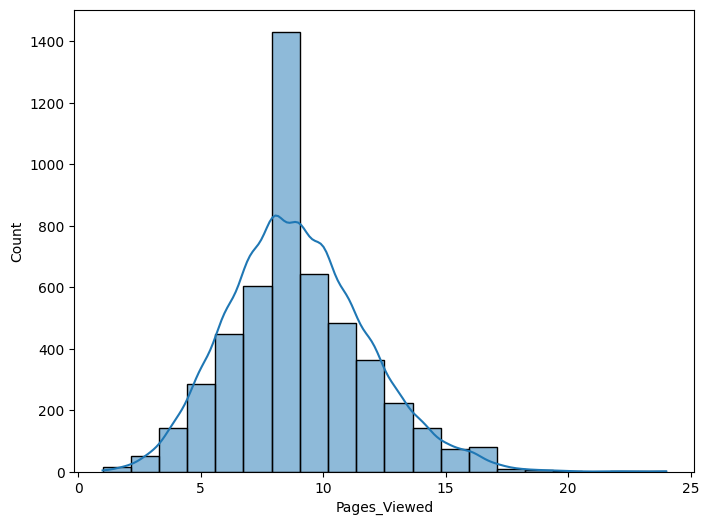

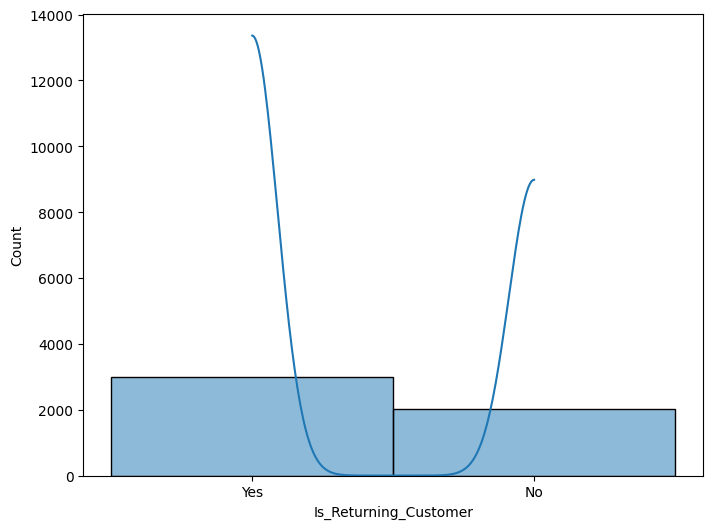

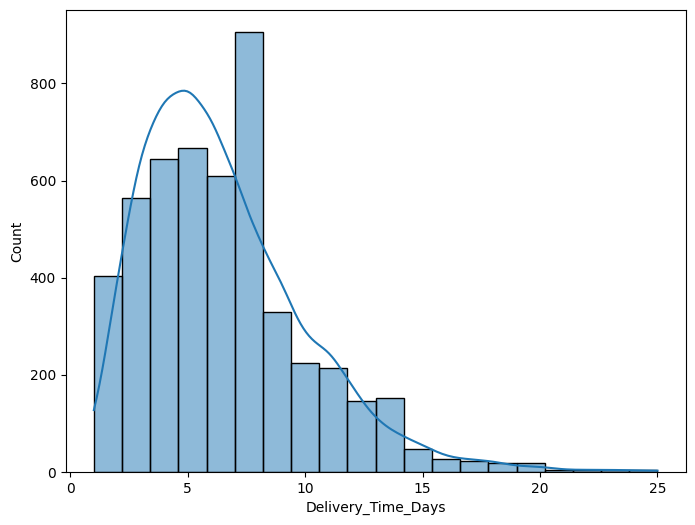

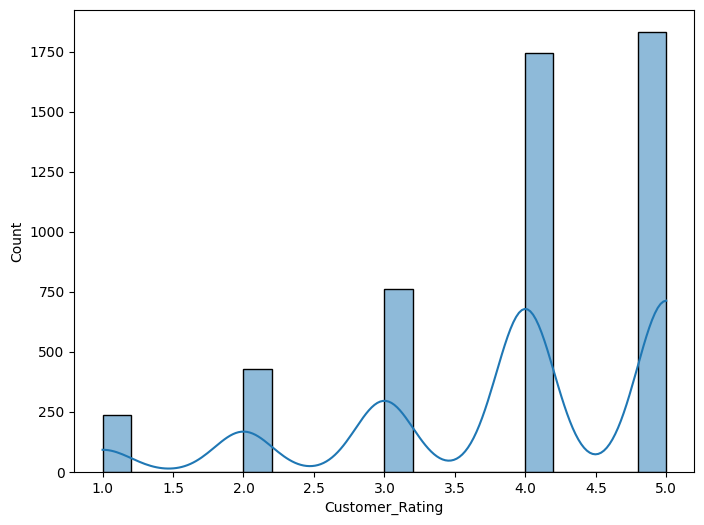

In [11]:
for cols in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data[cols],bins= 20,kde=True)

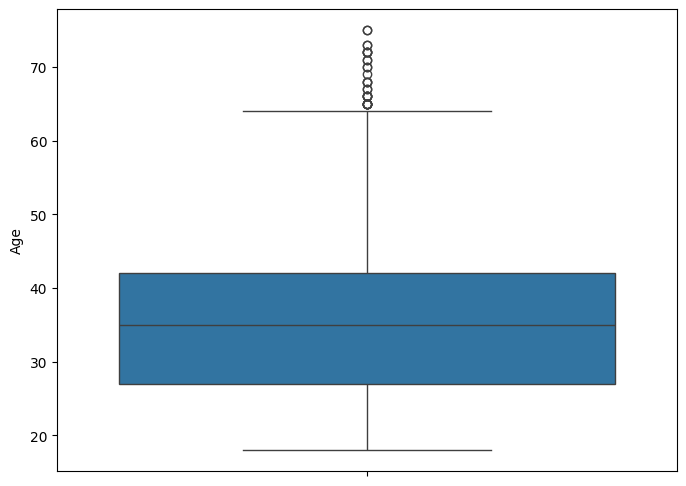

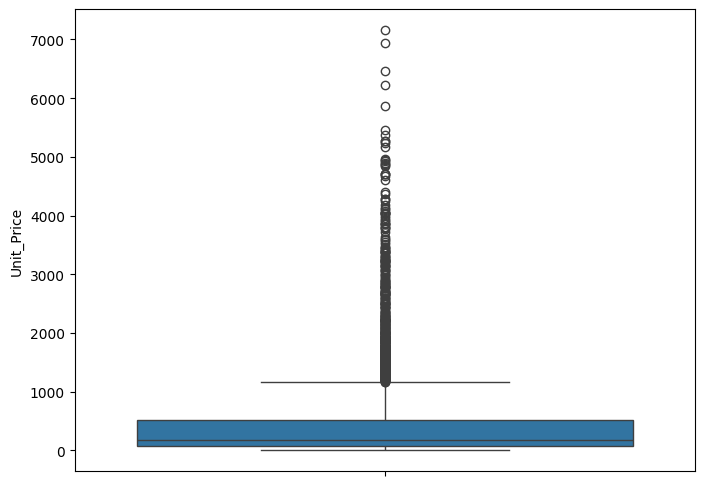

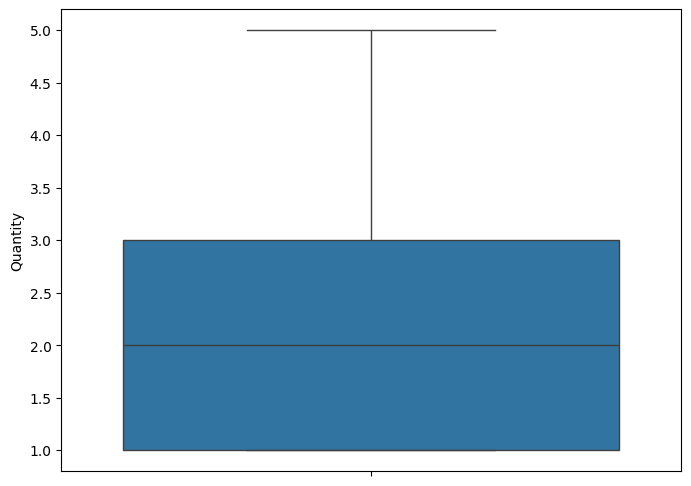

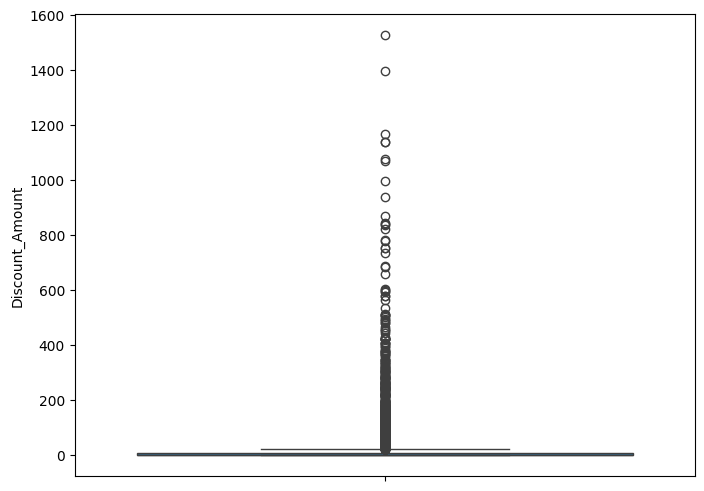

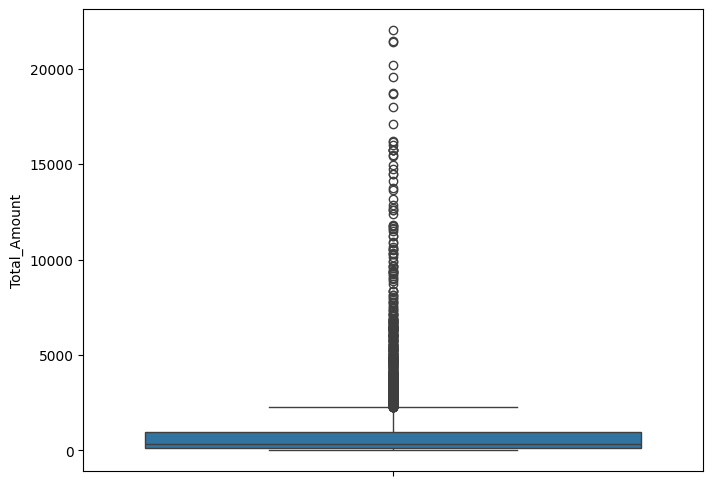

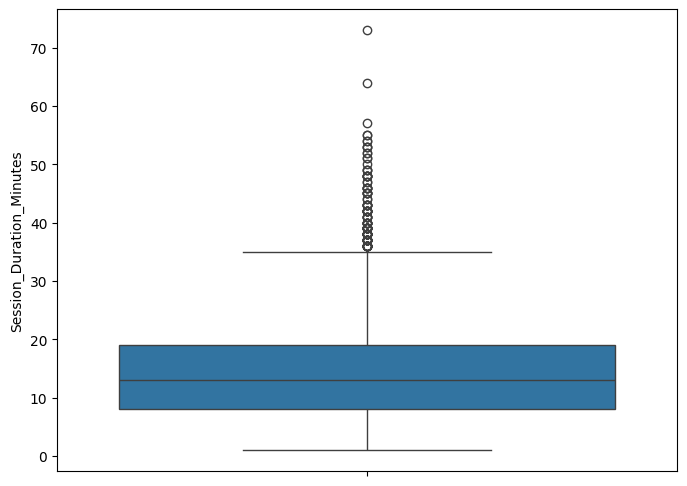

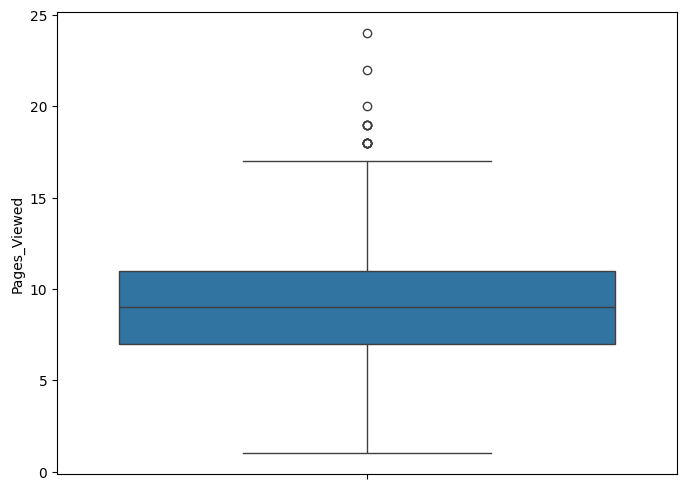

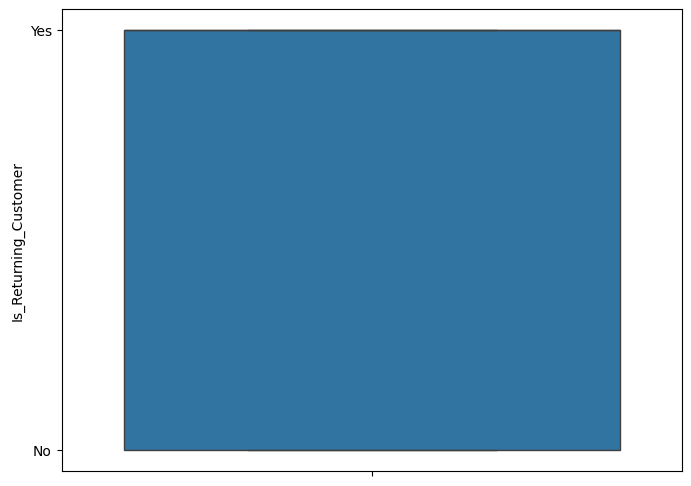

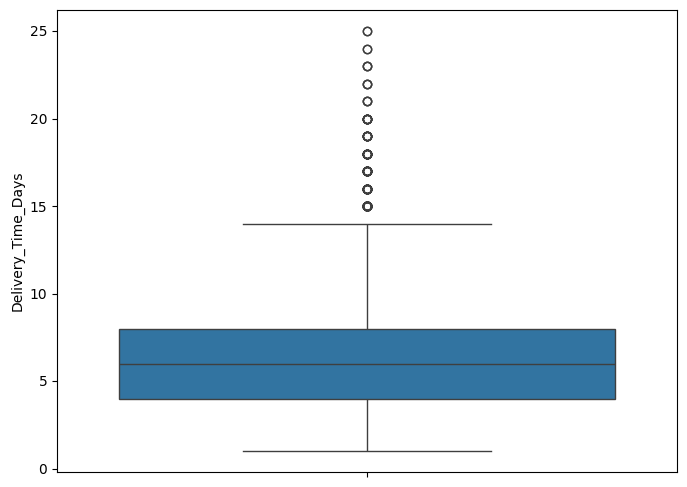

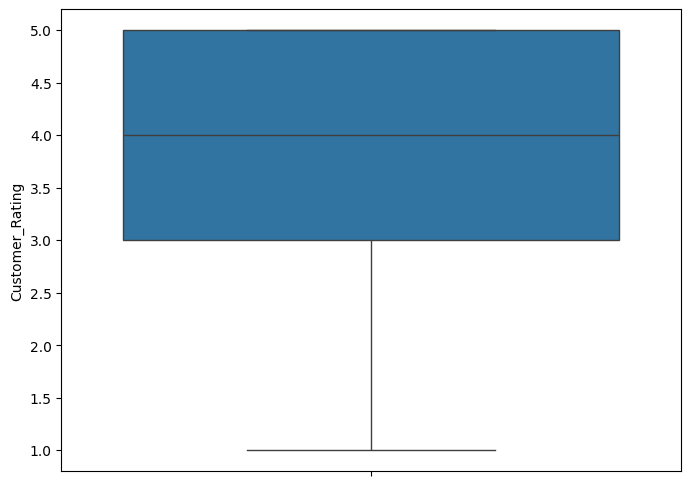

In [12]:
for columns in numeric_columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data[columns])

## *Remove Outliers* 

In [13]:
##  Remove Outliers Into Age Column  

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = Q3 - Q1

Upper_bond = Q3 + 1.5 * IQR
Lower_bond = Q1 - 1.5 * IQR 

Outliers = data[(data["Age"] > Upper_bond) | (data['Age'] < Lower_bond)]

data = data.drop(Outliers.index)

<Axes: xlabel='Age'>

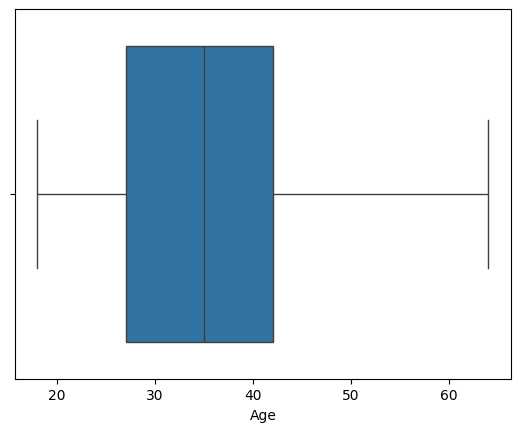

In [14]:
sns.boxplot(data=data,x=data['Age'])

In [15]:
##  Remove Outliers Into Unit_Price  

q1 = data['Unit_Price'].quantile(0.25)
q3 = data['Unit_Price'].quantile(0.75)

IQR = q3 - q1

Upper_bond = q3 + 1.5 * IQR
Lower_bond = q1 - 1.5 * IQR 

Outliers = data[(data["Unit_Price"] > Upper_bond) | (data['Unit_Price'] < Lower_bond)]

data = data.drop(Outliers.index)

<Axes: xlabel='Unit_Price'>

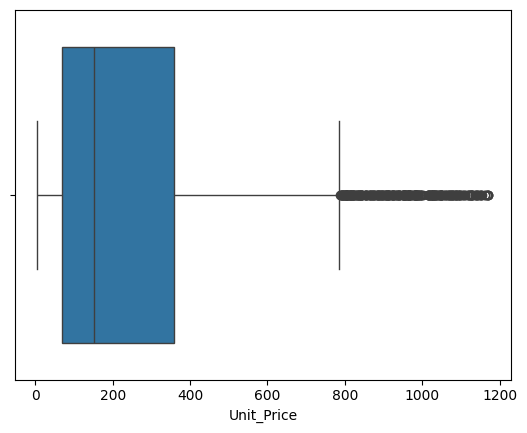

In [16]:
sns.boxplot(data=data,x=data['Unit_Price'])

In [17]:
##  Remove Outliers Into Unit_Price  

q1 = data['Discount_Amount'].quantile(0.25)
q3 = data['Discount_Amount'].quantile(0.75)

IQR = q3 - q1

Upper_bond = q3 + 1.5 * IQR
Lower_bond = q1 - 1.5 * IQR 

Outliers = data[(data["Discount_Amount"] > Upper_bond) | (data['Discount_Amount'] < Lower_bond)]

data = data.drop(Outliers.index)

<Axes: xlabel='Discount_Amount'>

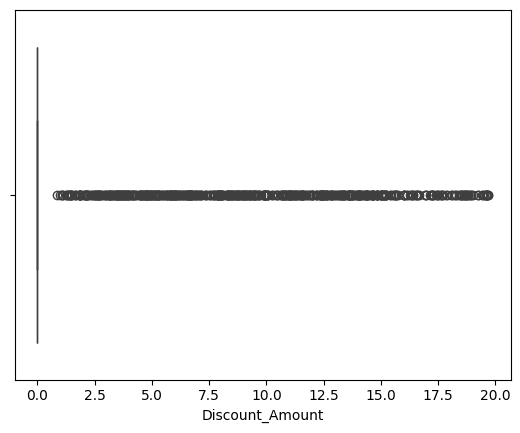

In [18]:
sns.boxplot(data=data,x=data['Discount_Amount'])

## *Feature Engineering*

In [19]:
data.head(5)

,SS,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.0,54.28,Debit Card,Mobile,4,14,Yes,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.0,244.90,Credit Card,Mobile,11,3,Yes,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.0,240.75,Credit Card,Mobile,7,8,Yes,5,2
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.0,3778.05,Cash on Delivery,Desktop,21,10,Yes,7,4
5,ORD_000223,CUST_00223,2023-01-01,43,Female,Istanbul,Beauty,122.46,1,0.0,122.46,Credit Card,Mobile,14,9,Yes,9,5


### create Age Group bins For Better Analysis 

In [20]:
data['Age_Group'] = pd.cut(data['Age'],bins=[0, 12, 19, 35, 60, 100],labels= ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

### Time feature 

In [21]:
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
data['Days_Name'] = data['Date'].dt.day_name()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3687 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SS                        3687 non-null   object        
 1   Customer_ID               3687 non-null   object        
 2   Date                      3687 non-null   datetime64[ns]
 3   Age                       3687 non-null   int64         
 4   Gender                    3687 non-null   object        
 5   City                      3687 non-null   object        
 6   Product_Category          3687 non-null   object        
 7   Unit_Price                3687 non-null   float64       
 8   Quantity                  3687 non-null   int64         
 9   Discount_Amount           3687 non-null   float64       
 10  Total_Amount              3687 non-null   float64       
 11  Payment_Method            3687 non-null   object        
 12  Device_Type              

# *Data Analysis*

In [24]:
Total_revenue = data.groupby(['Gender'])['Total_Amount'].sum()
Total_revenue

Gender
Female    961796.61
Male      881568.64
Other      24786.92
Name: Total_Amount, dtype: float64

In [25]:
## Average Revunue By Gendar 

data.groupby(['Gender'])['Total_Amount'].mean().round(2)

Gender
Female    526.15
Male      488.13
Other     467.68
Name: Total_Amount, dtype: float64

<Axes: xlabel='Gender', ylabel='Total_Amount'>

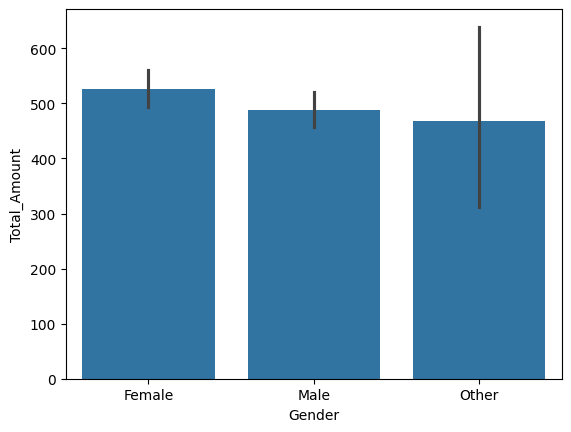

In [26]:
sns.barplot(data=data, x= data['Gender'],y= data['Total_Amount'])

In [27]:
Top5_city = data.groupby(['City'])['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending= False)
Top5_city

,City,Total_Amount
6,Istanbul,478015.68
1,Ankara,292210.13
7,Izmir,233708.63
3,Bursa,184886.68
0,Adana,135028.67
9,Konya,130614.88
5,Gaziantep,125866.42
2,Antalya,113848.26
8,Kayseri,96853.56
4,Eskisehir,77119.26


In [28]:
## Average Revenue by City

Avg_City = data.groupby(['City'])['Total_Amount'].mean().reset_index().sort_values(by='Total_Amount', ascending= False)
Avg_City.columns = ['City','Avg_Amount']
Avg_City

,City,Avg_Amount
9,Konya,588.355315
8,Kayseri,526.378043
1,Ankara,524.614237
7,Izmir,514.776718
6,Istanbul,503.174400
4,Eskisehir,500.774416
3,Bursa,499.693730
0,Adana,498.260775
5,Gaziantep,497.495731
2,Antalya,418.559779


In [29]:
Product_Category = data.groupby(['Product_Category'])['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending= False)
Product_Category

,Product_Category,Total_Amount
6,Sports,447169.61
5,Home & Garden,443181.60
3,Fashion,286547.12
2,Electronics,233288.80
7,Toys,176762.01
0,Beauty,126644.11
4,Food,87507.50
1,Books,67051.42


<Axes: xlabel='Is_Returning_Customer', ylabel='percent'>

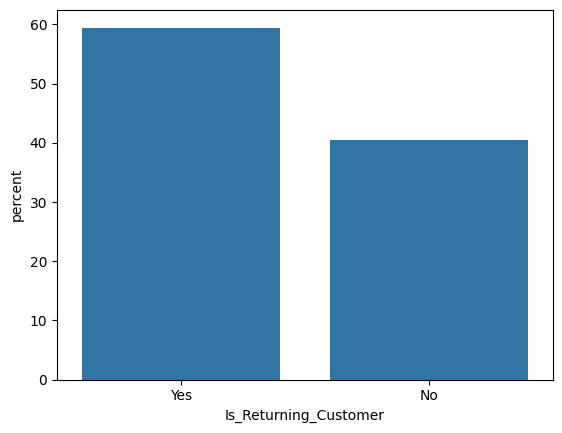

In [30]:
sns.countplot(data=data, x='Is_Returning_Customer',stat= 'percent')

### Payment Method 

In [31]:
data['Payment_Method'].value_counts()

Payment_Method
Credit Card         1465
Debit Card           926
Digital Wallet       723
Bank Transfer        387
Cash on Delivery     186
Name: count, dtype: int64

In [32]:
Payment_Method = data.groupby(['Payment_Method'])['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending= False)
Payment_Method

,Payment_Method,Total_Amount
2,Credit Card,754044.85
3,Debit Card,455487.59
4,Digital Wallet,358074.94
0,Bank Transfer,199728.88
1,Cash on Delivery,100815.91


In [33]:
## Average Payment Method By Total Amount 

Payment_Method = data.groupby(['Payment_Method'])['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending= False)
Payment_Method.columns = ['Payment_Method','Avg_Amount']
Payment_Method

,Payment_Method,Avg_Amount
2,Credit Card,754044.85
3,Debit Card,455487.59
4,Digital Wallet,358074.94
0,Bank Transfer,199728.88
1,Cash on Delivery,100815.91


### Age 

<Axes: xlabel='Age', ylabel='count'>

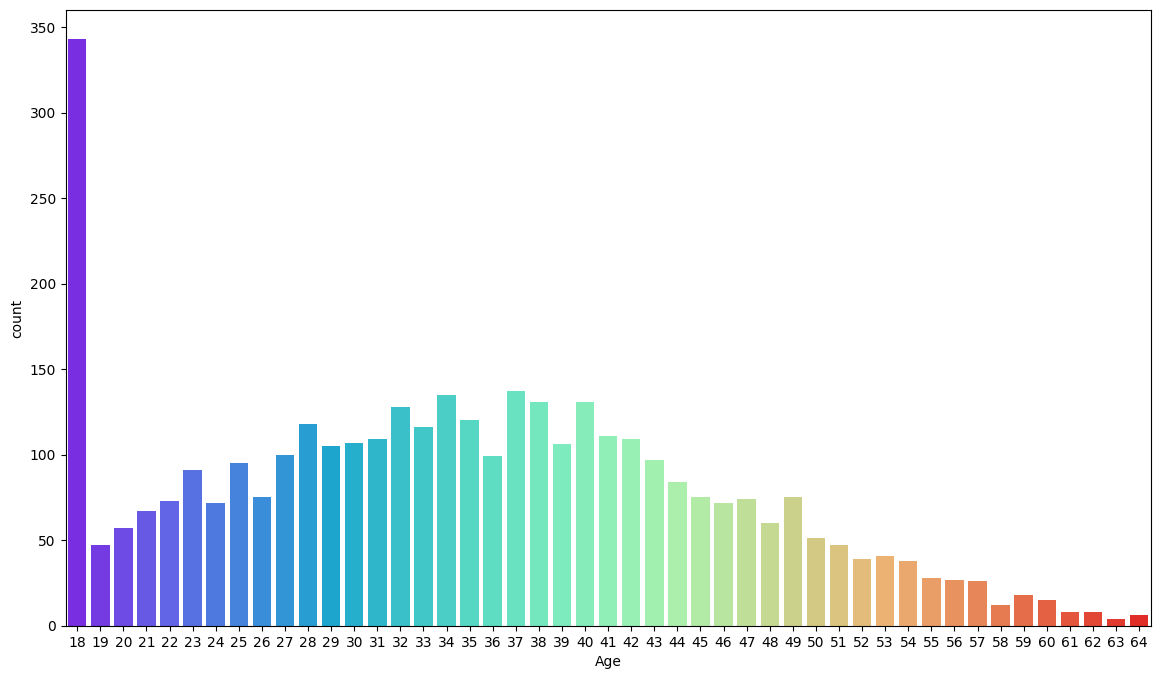

In [51]:
## Age 
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x = 'Age', palette='rainbow')

In [34]:
data['Age_Group'].value_counts()

Age_Group
Adult          1703
Young Adult    1568
Teen            390
Senior           26
Child             0
Name: count, dtype: int64

In [35]:
## Revenue By Age Group 

data.groupby(['Age_Group'])['Total_Amount'].sum()

Age_Group
Child               0.00
Teen           205548.43
Young Adult    768961.17
Adult          881596.82
Senior          12045.75
Name: Total_Amount, dtype: float64

In [43]:
## Each Age per Average top 10  Order value 

Avg_Per_Age = data.groupby(['Age'])['Total_Amount'].mean().reset_index().sort_values(by = 'Total_Amount',ascending= False)
Avg_Per_Age.columns = ['Age','Avg_Order_Value']
Avg_Per_Age

,Age,Avg_Order_Value
45,63,685.340000
42,60,645.029333
22,40,637.558015
35,53,635.757317
33,51,629.845957
29,47,619.625405
7,25,613.122842
44,62,610.243750
38,56,593.598519
24,42,587.098991


<Axes: xlabel='Age', ylabel='Avg_Order_Value'>

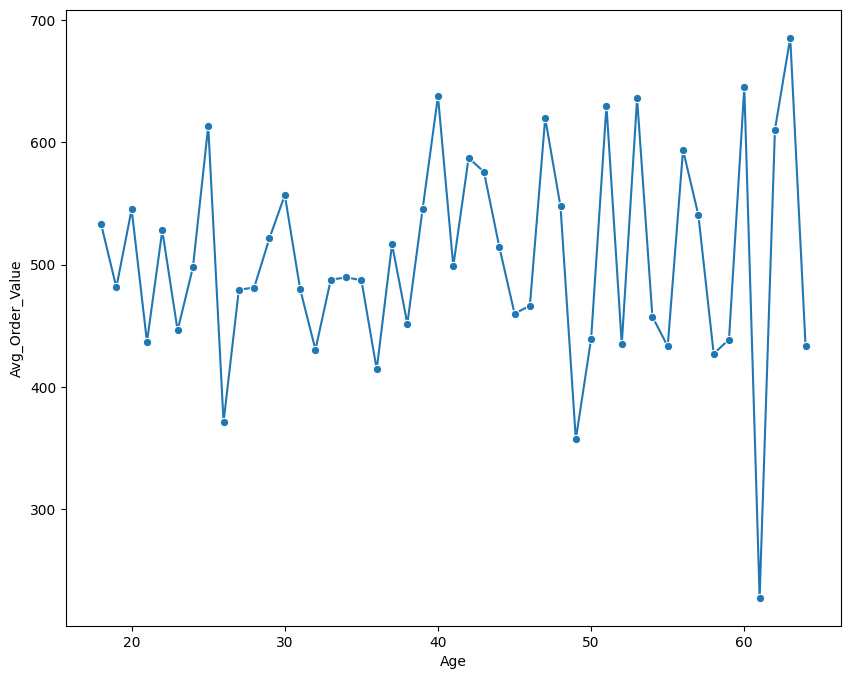

In [47]:
plt.figure(figsize=(10,8))
sns.lineplot(data=Avg_Per_Age, x= 'Age', y= 'Avg_Order_Value',marker='o')

## Analysis By Days 

<Axes: xlabel='Days_Name', ylabel='percent'>

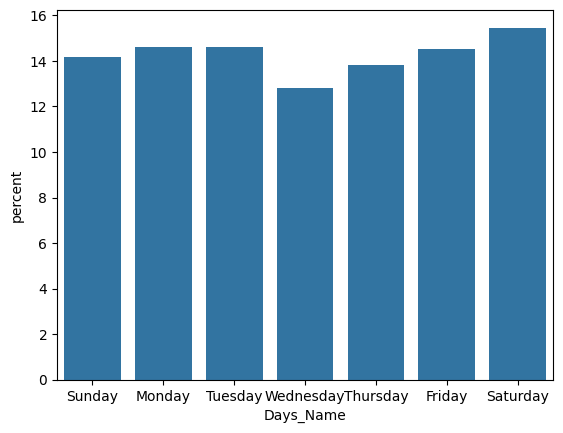

In [66]:
sns.countplot(data=data, x = 'Days_Name',stat='percent')

In [61]:
Total_Revenue_by_Days = data.groupby(['Days_Name']) ['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount',ascending= False)
Total_Revenue_by_Days.columns = ['Days_Name','Total_Revenue']
Total_Revenue_by_Days

,Days_Name,Total_Revenue
2,Saturday,292648.40
1,Monday,280253.17
5,Tuesday,278146.24
4,Thursday,269812.21
3,Sunday,264886.29
0,Friday,260564.51
6,Wednesday,221841.35


<Axes: xlabel='Days_Name', ylabel='Total_Revenue'>

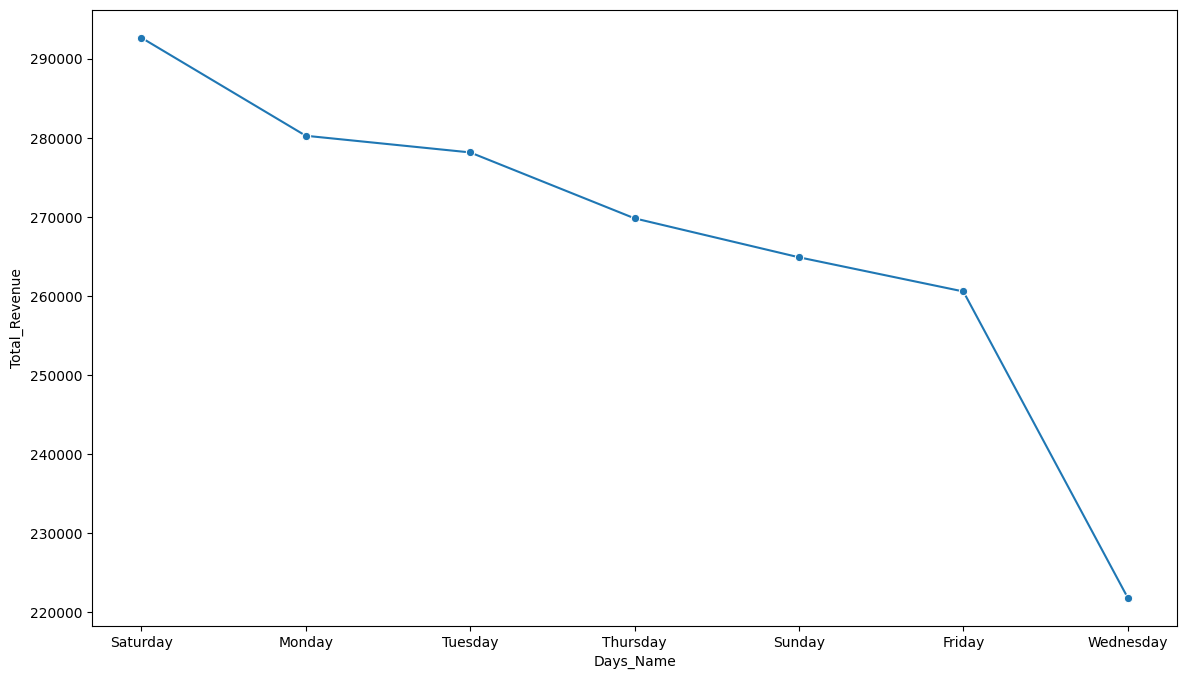

In [64]:
plt.figure(figsize=(14,8))
sns.lineplot(data = Total_Revenue_by_Days, x = 'Days_Name', y= 'Total_Revenue',marker='o')

<Axes: xlabel='Delivery_Time_Days', ylabel='count'>

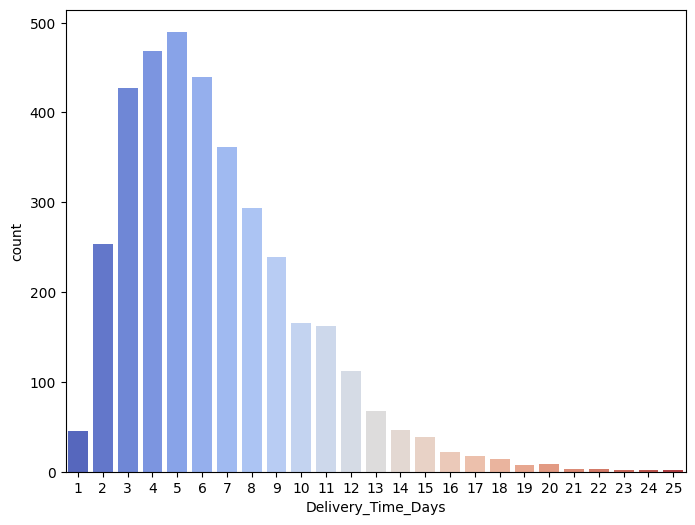

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x = 'Delivery_Time_Days',palette= 'coolwarm')

<Axes: xlabel='Customer_Rating', ylabel='count'>

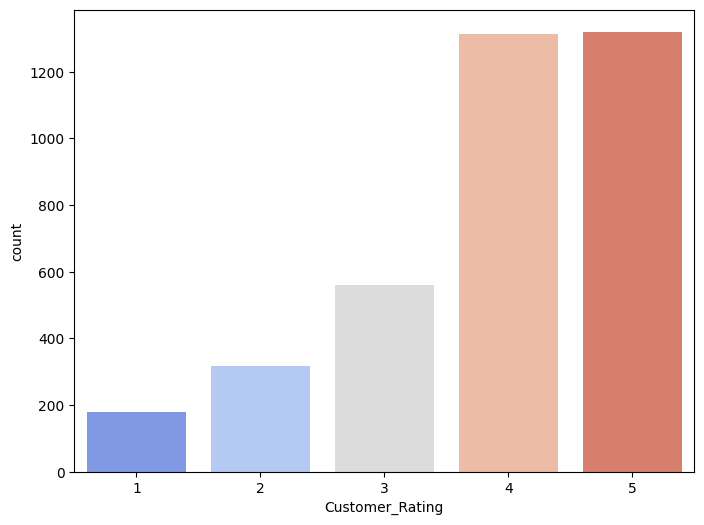

In [73]:
## Customer Rating Analysis 

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x = 'Customer_Rating',palette= 'coolwarm')

In [75]:
data.groupby(['Product_Category'])['Customer_Rating'].mean().reset_index().sort_values(by= 'Customer_Rating',ascending= False)

,Product_Category,Customer_Rating
1,Books,3.959114
2,Electronics,3.944785
5,Home & Garden,3.900270
0,Beauty,3.899441
6,Sports,3.882353
7,Toys,3.879684
3,Fashion,3.873967
4,Food,3.818653


In [37]:
data.tail()

,SS,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Age_Group,Days_Name
4993,ORD_001360,CUST_01360,2024-03-26,37,Female,Bursa,Toys,99.46,1,0.00,99.46,Bank Transfer,Desktop,5,9,No,4,1,Adult,Tuesday
4994,ORD_003209,CUST_03209,2024-03-26,45,Male,Izmir,Food,50.69,1,11.72,38.97,Credit Card,Desktop,5,6,No,2,1,Adult,Tuesday
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,Yes,6,4,Young Adult,Tuesday
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,Yes,5,4,Adult,Tuesday
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,Yes,5,4,Adult,Tuesday
